# Introduction-to-scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the 
beautiful Scikit-Learn Library

What we're going to cover:


In [267]:
#Let's listify the contents
what_were_covering = [
    "0. An end-to end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

## 0. An end-to-end Scikit-Learn workflow

In [268]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
#1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [270]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [271]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [272]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [273]:
clf.fit(X_train, y_train);

In [274]:
#make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [275]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [276]:
y_test

162    1
45     1
22     1
277    0
74     1
      ..
201    0
203    0
198    0
185    0
289    0
Name: target, Length: 61, dtype: int64

In [277]:
#4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [278]:
clf.score(X_test,y_test)

0.8360655737704918

In [279]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [280]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [281]:
confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 4, 30]])

In [282]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [283]:
#5. Improve a model
# Try different amount od n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
    print(f"Model accuarcy on test set:{clf.score(X_test,y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators....
Model accuarcy on test set:88.52%
 
Trying model with 20 estimators....
Model accuarcy on test set:86.89%
 
Trying model with 30 estimators....
Model accuarcy on test set:85.25%
 
Trying model with 40 estimators....
Model accuarcy on test set:83.61%
 
Trying model with 50 estimators....
Model accuarcy on test set:85.25%
 
Trying model with 60 estimators....
Model accuarcy on test set:85.25%
 
Trying model with 70 estimators....
Model accuarcy on test set:85.25%
 
Trying model with 80 estimators....
Model accuarcy on test set:88.52%
 
Trying model with 90 estimators....
Model accuarcy on test set:85.25%
 


In [284]:
#6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [285]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test,y_test)

0.8524590163934426

## 1 . Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and label(usually 'X' & 'y')
    2. Filling (also called inputing) or disregarding missing values
    3 converting non-numerical values into numerical values(also called feature encoding)

In [286]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [287]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [288]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [289]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.2))

In [290]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [291]:
X.shape

(303, 13)

### 1.1 Make sure it's all numerical`

In [292]:
car_sales =pd.read_csv("scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [293]:
len(car_sales)

1000

In [294]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [295]:
# Split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

#Split into training and test
X_train, X_test, y_train ,y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [296]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: 'Toyota'

In [297]:
# Turn the categorieds into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #Doors can be considered categorical as it is 3,4,2
one_hot = OneHotEncoder()

## one hot encoder 



transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X
    

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [298]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [299]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [300]:
#One more way to do this
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [301]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, t_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [302]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [303]:
model.score(X_test,y_test)

-0.6789782769002013

### 1.2 What if there were missing values?

1. Fill them with some value(also known as imputation).
2. Remove the samples with missing data altogether.


In [304]:
# Import car sales missing data
car_sales_missing =pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [305]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [306]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [307]:
# Let's try and covert our data to numbers
# Turn the categorieds into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #Doors can be considered categorical as it is 3,4,2
one_hot = OneHotEncoder()

## one hot encoder 



transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [308]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with Pandas

In [309]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace =True)

In [310]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [311]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [312]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [313]:
len(car_sales_missing)

950

In [314]:
X = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"] 

In [315]:
# Let's try and covert our data to numbers
# Turn the categorieds into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #Doors can be considered categorical as it is 3,4,2
one_hot = OneHotEncoder()

## one hot encoder 



transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing values with scikit learn

In [316]:
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [317]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [318]:
#Drop the rows with no labels
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [319]:
# Split into X & y
X = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]

In [320]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [321]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer,cat_features),
    ("door_imputer", door_imputer,door_feature),
    ("num_imputer", num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [322]:
car_sales_filled = pd.DataFrame(filled_X,
                                 columns= ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [323]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [324]:
# Let's try and covert our data to numbers
# Turn the categorieds into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #Doors can be considered categorical as it is 3,4,2
one_hot = OneHotEncoder()

## one hot encoder 



transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [325]:
# Now we've got our data as numbers and filled(no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train ,y_train)
model.score(X_test, y_test)

0.21990196728583944

In [326]:
len(car_sales_filled), len(car_sales)

(950, 1000)

 ## 2. Choosing the right estimator/algorithm for our problem

Scikit Learn uses estimator as another tern for machine learning model or algorithm

Classification - predicting whether a sample is one thing or another
Regression - predicting a number


### 2.1 Picking a machine learning model for a regression problem

In [327]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [328]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [329]:
 # How many samples?
len(boston_df)


506

In [330]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522


## 2.2 Choosing an estimator for a classification problem
let's go to the map..
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



In [331]:
heart_disease = pd.read_csv("scikit-learn-data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [332]:
len(heart_disease) 

303

Consulting the map and it says to try `LinearSVC`.

In [333]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(X_train,y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)


/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [334]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [335]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)



0.8524590163934426

Tidbit :
 1. If you have structured data,used ensemble methods
 2. If you have unstructured data, use deep learning or transfer learning

In [336]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data


Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables, ground truth

In [337]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [338]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [339]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2  Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`


In [340]:
# Use a trained model to make predictions 
clf.predict(np.array([1,7,8,3,4]))# this doesn't work....

/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [341]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [342]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [343]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [344]:
# Comare predictions to tuth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [345]:
clf.score(X_test,y_test)

0.8524590163934426

In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict proba()`

In [347]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

#In this case it predicts,for the first case, probability of being 0 is 0.89 and of being 1 is 0.11

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [348]:
#Let's predict() on the the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [349]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [350]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression model

In [351]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [352]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into taining and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)

In [353]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [354]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [355]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evalutating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [356]:
from sklearn.ensemble import  RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train) 

RandomForestClassifier()

In [357]:
clf.score(X_train, y_train)

1.0

In [358]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [359]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into taining and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(X_train,y_train)

In [360]:
model.score(X _test, y_test)

SyntaxError: invalid syntax (1964744925.py, line 1)

### 4.2 Evaluating a model using the scoring parameter

In [361]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import  RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train);

In [362]:
clf.score(X_test,y_test)

0.8524590163934426

In [363]:
cross_val_score(clf,X,y)
#creates 5 different splits of data and tests it

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [364]:
%%html
<img src = "Cross_value_score.png"/>

In [365]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [366]:
np.random.seed(42)
    
# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

#We prefer cross_val_score even thought it's lower

(0.8524590163934426, 0.8248087431693989)

In [367]:
#Default scoring parameter of classifier = mean accuracy
clf.score(X_test,y_test)

0.8524590163934426

In [368]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification model

**Accuracy**

In [369]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [370]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [371]:
np.mean(cross_val_score) 

0.8248087431693989

In [372]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100 : .2f}%")

Heart Disease Classifier Cross-Validated Accuracy :  82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate(tpr) versus a models false positive rate(fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [373]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [374]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len (y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [375]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [376]:
# Calculate fpr, tpr and thresholds
fpr,tpr,threshols = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

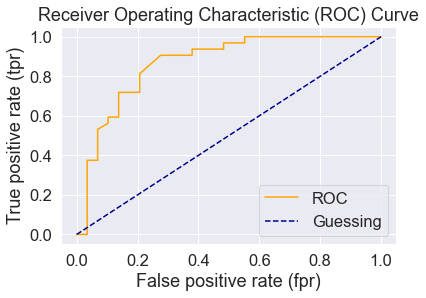

In [377]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    #Plot roc curve
    plt.plot(fpr,tpr,color = "orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--",label = "Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [378]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

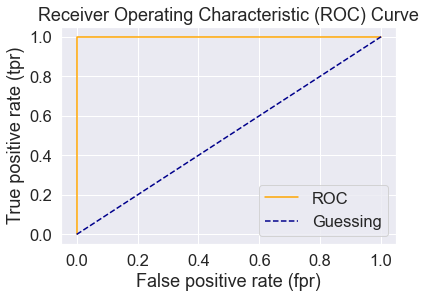

In [379]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [380]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

 **Confusion matrix**
 
A confusion matrix is a quick way to compare labels a models and the actual label it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [381]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [382]:
# Visualize confusion matrics with pd crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Label,,
0,23,6
1,6,26


In [383]:
#It is  read as in when actual labels is 0 we have predicted 24 0's and 5 1's

In [384]:
22+7+8+24

61

In [385]:
len(X_test)

61

In [386]:
import sys
!conda install --yes --prefix (sys.prefix) seaborn

zsh:1: unknown file attribute: y


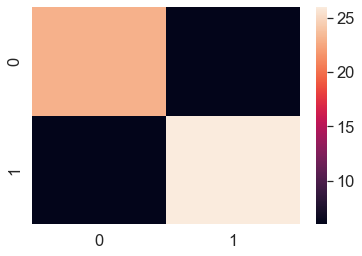

In [387]:
# Make our confusion matrix more visual with seaborn heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale = 1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

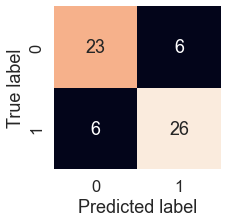

In [388]:

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap
    
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot =True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label");
    

plot_conf_mat(conf_mat) 

/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


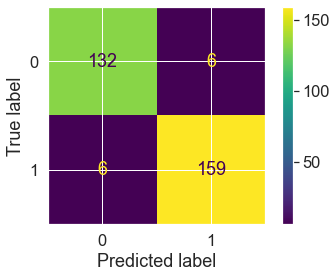

In [389]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

**Classification Report**

In [390]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [391]:
%%html
<img src = "images/classification_report.png"/>

In [392]:
# Where precison and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict= True))

/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkarshagrawal/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification matrics:

* **Accuracy** is a good measure to start with if all classses are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **Recall** become more important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for higher precison
* if false neagtive are worse than false positives, aum for higher recall
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of number it's R^2 value would be 1.

In [393]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [394]:
model.score(X_test,y_test)

0.8654448653350507

In [395]:
from sklearn.metrics import r2_score 

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [396]:
y_test.mean()

21.488235294117654

In [397]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [398]:
r2_score(y_test,y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are. 

In [399]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [400]:
df = pd.DataFrame(data = {"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared error (MSE)**

In [401]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [402]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.2.3 Finally using the `scoring` parameter

In [403]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [404]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [405]:
# Cross Validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [406]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv=5,scoring = "accuracy")
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [407]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring ="precision")
np.mean(cv_precision)

0.8085601538512754

In [408]:
# Recall
cv_recall = cross_val_score(clf, X, y,cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [409]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [410]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis = 1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators = 100)

In [411]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [412]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring = "r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [413]:
#Mean absolute error
cv_mae =  cross_val_score(model, X, y, cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [414]:
#Mean absolute error
cv_mse =  cross_val_score(model, X, y, cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

### 4.3 Using different evaluation metrics as Scikit_Learn functions

**Classification evaluation functions**

In [415]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1) 
y = heart_disease["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Make some predictions
y_preds = clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: { f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [416]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y= boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

#Make predictions using our regression model
y_preds=model.predict(X_test)

#Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model.

From a data prespective.
* Could we collect more data?(genereally the more data, the better)
* Could we improve our data? 

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model find these in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparamters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [417]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [418]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparamters by hand

Let's make 3 sets, traing, validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [419]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on 
    a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc: {accuracy *100:.2f}%")
    print(f"Precison:{precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: { f1:.2f}")
    
    return metric_dict
                    
        

In [420]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len (heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf= RandomForestClassifier()
clf.fit(X_train,y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precison:0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [421]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

#Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precison:0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparamter tuning with RandomizedSearchCV`

In [422]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) 

# Instatntiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                       param_distributions = grid,
                       n_iter = 10,# number of models to try
                       cv = 5,
                       verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [423]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [424]:
# Make predicts with the best hyperparametrs
rs_y_preds =  rs_clf.predict(X_test)

#Evalutare the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precison:0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

This is different form RandomisedSearchCV as it goes through every possible combination in the grid(Brute force)

In [425]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [426]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [30],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4],
          'min_samples_leaf': [1, 2]}

In [427]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) 

# Instatntiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)
# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                       param_grid= grid_2,
                       cv = 5,
                       verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200

In [428]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [429]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precison:0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different models metrics.

<AxesSubplot:>

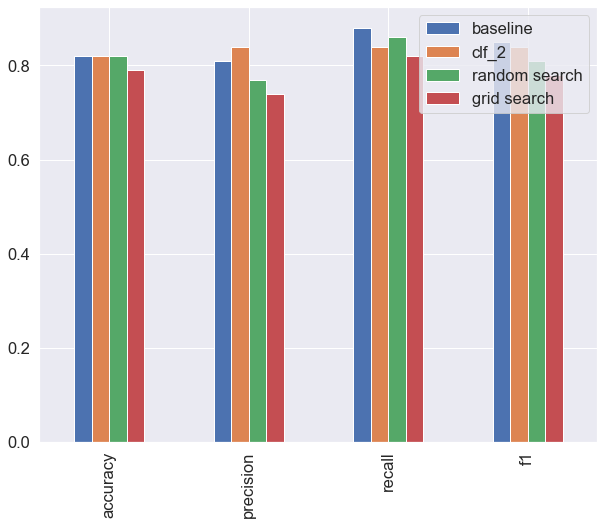

In [430]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search ":gs_metrics})
compare_metrics.plot.bar(figsize = (10,8))

## Saving and loadfding trained machine learning models

Two ways to load and save machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [444]:
import pickle

#Save an existing model to file 
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [445]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [446]:

# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_preds,pickle_y_preds)

ValueError: Found input variables with inconsistent numbers of samples: [45, 61]

**Joblib**

In [447]:
from joblib import dump, load

# Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [448]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [449]:
#Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 95.08%
Precison:0.97
Recall: 0.94
F1 score: 0.95


{'accuracy': 0.95, 'precision': 0.97, 'recall': 0.94, 'f1': 0.95}

## 7. Putting it all together!

In [450]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [451]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [452]:
 data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do(all in one cell):
1. Fill missing data
2. Covert data to numbers
3. Build a model on the data

In [461]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer =Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant",fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

#Setup preprocessing steps(fill missing values , then convert to numbers)
preprocessor = ColumnTransformer(
transformers=[
    ("cat", categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_features)
])

#Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

#Split data
X = data.drop("Price", axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` and `RandomizedSearchCV` with our `Pipeline`

In [462]:
#Use GrideSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4] 
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [463]:
 gs_model.score(X_test,y_test)

0.3339554263158365

In [464]:
def findNumber(arr,k):
    if k in arr:
        print("YES")
    else:
        print("NO")
arr=[1,2,354,6,7853,2]
k=6
findNumber(arr,k)

YES
